In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"/Users/olaoluwatunmise/flipside_data_science/near_data.csv",parse_dates=['DATE'])

# Adjust the total_volume to remove scientific notation
df['TOTAL_VOLUME'] = df['TOTAL_VOLUME'].apply(lambda x: '{:.2f}'.format(x))
df

,DATE,PRICE,TOTAL_VOLUME
0,2024-07-09 00:00:00.000,4.507692,447589.40
1,2024-07-08 00:00:00.000,4.473750,1194155.73
2,2024-07-07 00:00:00.000,4.679167,960226.53
3,2024-07-06 00:00:00.000,4.573750,494359.08
4,2024-07-05 00:00:00.000,4.363750,1655080.34
...,...,...,...
1030,2021-09-13 00:00:00.000,8.334774,1775871.63
1031,2021-09-12 00:00:00.000,9.009154,1548925.81
1032,2021-09-11 00:00:00.000,9.214943,1587581.58
1033,2021-09-10 00:00:00.000,9.430540,1389352.32


In [2]:
# Calculate daily returns
df['returns'] = df['PRICE'].pct_change().dropna()

# Display the first few rows with returns
#print(df.head())

# Calculate mean and standard deviation of returns
mean_return = df['returns'].mean()
std_return = df['returns'].std()

print(f"Expected Return: {mean_return}")
print(f"Volatility: {std_return}")




Expected Return: 0.0018849854656829402
Volatility: 0.04849833078767601


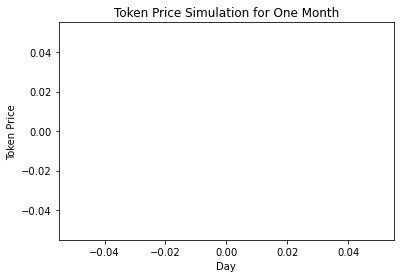

Final token price after one month: nan


In [3]:
# Define parameters for the simulation
S0 = df['PRICE'].iloc[-1]  # Use the last available price as the initial token price
T = 1/12  # Time period of one month (1/12 of a year)
N = 30  # Number of days in a month
dt = 1 / 365  # Time increment in daily terms (1/365 of a year)

# Create a DataFrame to store stock prices
simulation_df = pd.DataFrame(index=np.arange(N), columns=["PRICE"])
simulation_df["PRICE"][0] = S0

# Generate random variables for the Brownian motion
rand = np.random.normal(0, 1, N)

# Calculate stock prices using GBM formula
#for t in range(1, N):
   #simulation_df["PRICE"][t] = simulation_df["PRICE"][t-1] * np.exp((mean_return - 0.5 * std_return**2) * dt + std_return * np.sqrt(dt) * rand[t])
# Calculate stock prices using GBM formula
for t in range(1, N):
    simulation_df["PRICE"][t] = simulation_df["PRICE"][t-1] * np.exp((mean_return - 0.5 * std_return**2) * dt + std_return * np.sqrt(dt) * rand[t])


# Plot the stock price path
plt.plot(simulation_df["PRICE"])
plt.title('Token Price Simulation for One Month')
plt.xlabel('Day')
plt.ylabel('Token Price')
plt.show()

# Print the final stock price
print(f"Final token price after one month: {simulation_df['PRICE'].iloc[-1]:.2f}")

0       4.507692
1       4.473750
2       4.679167
3       4.573750
4       4.363750
          ...   
1029    8.656552
1030    8.334774
1031    9.009154
1032    9.214943
1033    9.430540
Name: PRICE, Length: 1034, dtype: float64


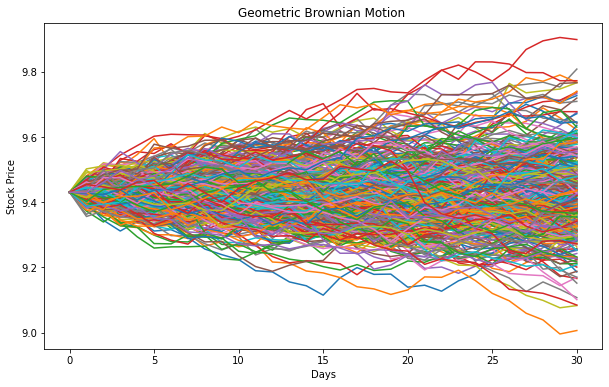

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def calculate_gbm(S0, T, mu, sigma, n_steps, n_sims):
    dt = T / n_steps
    gbm_paths = np.zeros((n_steps + 1, n_sims))
    gbm_paths[0] = S0

    for t in range(1, n_steps + 1):
        Z = np.random.standard_normal(n_sims)
        gbm_paths[t] = gbm_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    return gbm_paths

def main():
    closing_prices=pd.read_csv(r"near_data.csv", parse_dates=['DATE'])['PRICE'].dropna()
    print(closing_prices)   

    # Calculate log returns
    log_returns = np.log(closing_prices / closing_prices.shift(1)).dropna()
    mu = log_returns.mean()
    sigma = log_returns.std()

    # Simulation parameters
    S0 = closing_prices.iloc[-1]
    T = 1/12  # 1 year
    n_steps = 30  # Number of trading days in a year
    n_sims = 365  # Number of simulations

    gbm_paths = calculate_gbm(S0, T, mu, sigma, n_steps, n_sims)

    # Plotting the simulations
    plt.figure(figsize=(10, 6))
    plt.plot(gbm_paths)
    plt.title(f'Geometric Brownian Motion ')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.show()

if __name__ == '__main__':
    main()